# Linear Regression

## 1. Aproach with Gradient Descent

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,9)

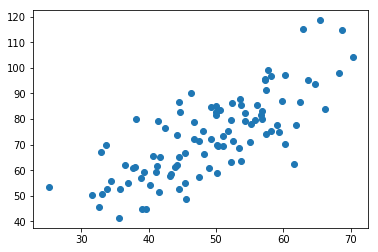

In [2]:
# Preprocessing Input data
data = pd.read_csv('data.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

In [38]:
import math

In [77]:
m=0
c=0
L = 0.0001
epochs = 1000
n = float(len(X))

errors=[]
history =[]
for i in range(epochs):
    y_pred = m*X + c
    if i % 10 == 0: 
        history.append({'m': m, 'c': c })
    errors.append( {'epoch': i, 'error': math.sqrt(sum(Y - y_pred)**2/n)} ) 
    Dm = -2 / n * sum( X * (Y - y_pred))
    Dc = -2 / n * sum(Y - y_pred)
    m = m - L * Dm
    c = c - L * Dc
    
print(m, c)

1.4796491688889395 0.10148121494753726


In [78]:
history_df = pd.DataFrame(history)

In [84]:
history_df.tail()

,c,m
95,0.097872,1.479720
96,0.098594,1.479706
97,0.099316,1.479692
98,0.100038,1.479677
99,0.100759,1.479663


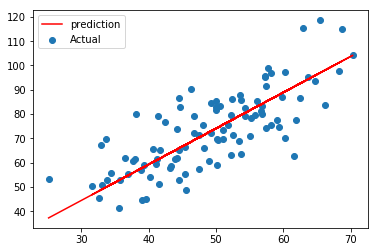

In [41]:
y_pred = m * X + c

plt.scatter(X,Y, label='Actual')
plt.plot(X, y_pred, color ='red', label='prediction')
plt.legend()
plt.show()

In [42]:
error_df = pd.DataFrame(errors)

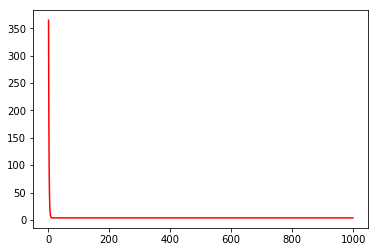

In [53]:
plt.plot( error_df.epoch[1:], error_df.error[1:], color ='red', label='RMSE')

## Method of least squares

In [154]:
import numpy as np

In [155]:
def cov(X, Y):
    return np.sum( (X - np.mean(X)) * (Y - np.mean(Y)))  / float(len(X)-1) 

In [156]:
cov(X,Y)

119.94313712020289

In [157]:
def coefficient(X, Y):
    covar = cov(X,Y)
    return covar / np.sqrt(np.var(X) * np.var(Y))

In [158]:
coefficient(X,Y)

0.7740833050297287

In [159]:
def slope(X,Y):
    return np.sum((X- np.mean(X)) * (Y - np.mean(Y))) / np.sum( (X - np.mean(X))**2 )

In [160]:
def intercept(X,Y):
    return np.mean(Y) - (np.mean(X) * slope(X,Y))

In [161]:
print(slope(X,Y), intercept(X,Y))

1.287357370010932 9.908606190326509


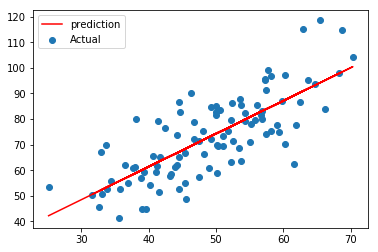

In [162]:
y_pred = slope(X,Y) * X + intercept(X,Y)

plt.scatter(X,Y, label='Actual')
plt.plot(X, y_pred, color ='red', label='prediction')
plt.legend()
plt.show()